# Image recognition on the Fashion MNIST dataset

Instead of classifying ten digits, let's try a slightly harder example: Classifying black-and-white images of fashion items. This dataset is known as the ["Fashion MNIST" dataset](https://keras.io/api/datasets/fashion_mnist/), due to its similarity to the original MNIST data.

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

## Load the data
The dataset contains 60 000 training images and 10 000 testing images, from 10 different categories:

| Label | Description |
| ----- | ----- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale the images to the [0, 1] interval
X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.

# Add the "channel" dimension
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


If we look at the target values in `y_train`, we see that these have labels 0-9:

In [5]:
print(y_train.shape)
print(y_train[:5])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


But, we rather want them to be _categorical_: instead of
```
y_train[0] -> 9
```
we want
```
y_train[0] -> [0 0 0 0 0 0 0 0 0 1]
```

### <span style="color: red;">Exercise:<span>
Convert the labels to categorical format, using the function `keras.utils.to_categorical`.

In [4]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train,num_classes = num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes = num_classes)

Now, let's get the image shape (width and height) by checking the first image:

In [6]:
image_shape = X_train[0].shape
print(image_shape)

(28, 28, 1)


Define the class names from the table above:

In [7]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

Plot the first few images.

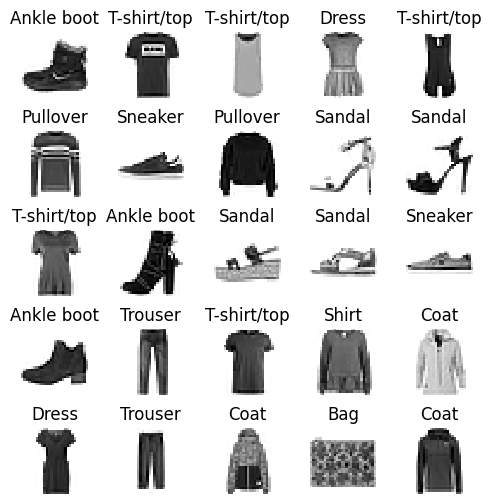

In [8]:
n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[np.argmax(y_train[index])])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

### <span style="color: red;">Exercise:<span>
Create a neural network yourself, using the Keras API.

In [155]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu",padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu",),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu",),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(num_classes, activation="softmax"),
])

### Compile and train the network

In [156]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [157]:
batch_size = 128   # How many images to load in a single batch
epochs = 15         # How many times to iterate over the full dataset

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6758 - loss: 0.9869 - val_accuracy: 0.8397 - val_loss: 0.4441
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8539 - loss: 0.4095 - val_accuracy: 0.8698 - val_loss: 0.3554
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8767 - loss: 0.3394 - val_accuracy: 0.8840 - val_loss: 0.3219
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8847 - loss: 0.3158 - val_accuracy: 0.8827 - val_loss: 0.3147
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8975 - loss: 0.2839 - val_accuracy: 0.8893 - val_loss: 0.2944
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9029 - loss: 0.2726 - val_accuracy: 0.8888 - val_loss: 0.3025
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9076 - loss: 0.2597 - val_accuracy: 0.9020 - val_loss: 0.2715
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9134 - loss: 0.2421 - val_accuracy: 0.

### Plot the training performance

Let's plot the training performance as function of epoch number.

First, have a look at the contents of the `history` dictionary:

In [158]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Plot the training and validation loss:

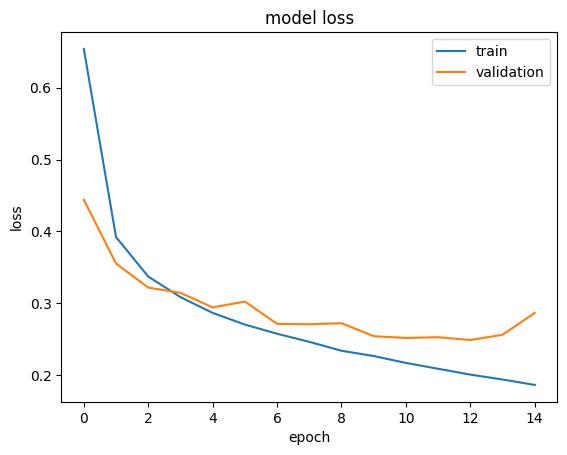

In [159]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Plot the accuracy:

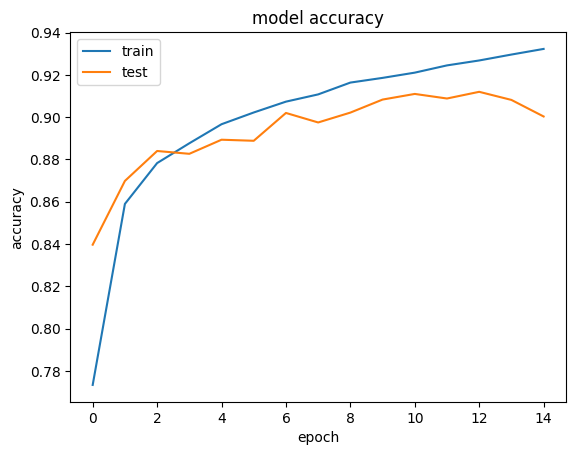

In [160]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluate your model on the test data

In [161]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.302127867937088
Test accuracy: 0.8981999754905701


### <span style="color: red;">Exercise:<span>
Try out different numbers of layers and different numbers of filters, to fint the best possible network. Train for as many epochs as you think is optimal (remember over- and underfitting).